# K Means Clustering on Retail Data

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.cluster import KMeans

In [4]:
## Data Import
# os.chdir("")
os.getcwd()

'C:\\Users\\Krishna Murthy\\Desktop\\Machine Learning\\UnSupervised'

In [5]:
KRCDF = pd.read_csv("C:\\Users\\Krishna Murthy\\Desktop\\Machine Learning\\UnSupervised\\Cust_Spend_Data.csv")
KRCDF

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [6]:
# Scale the data
from sklearn.preprocessing import scale as scale
scaled_RCDF = scale(KRCDF.iloc[:,2:7])

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
## Identify the optimal number of clusters 
# elbow method
cluster_range = range( 1, 10 )
cluster_wss = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(scaled_RCDF)
    cluster_wss.append( clusters.inertia_ )
from collections import OrderedDict
clusters_df = pd.DataFrame( OrderedDict ( 
        {"num_clusters": cluster_range, 
        "cluster_wss": cluster_wss }
        ) )
clusters_df[0:10]

,num_clusters,cluster_wss
0,1,50.000000
1,2,31.741877
2,3,19.885638
3,4,13.534707
4,5,7.826742
5,6,3.135406
6,7,2.036463
7,8,1.149500
8,9,0.293844


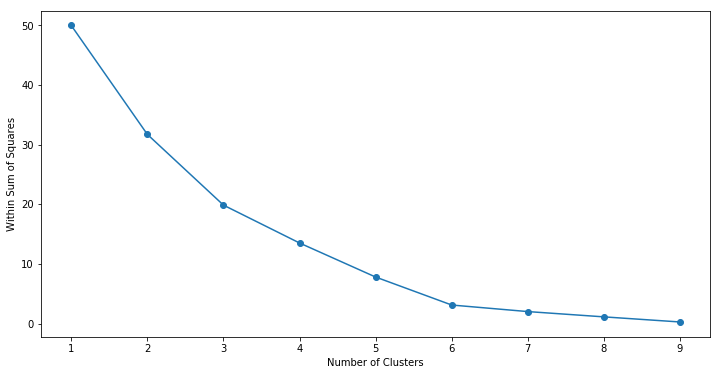

In [8]:
plt.figure(figsize=(12,6))
plt.xlabel('Number of Clusters')
plt.ylabel('Within Sum of Squares')
plt.xticks(np.arange(min(clusters_df.num_clusters), 
                     max(clusters_df.num_clusters)+1, 
                     1.0))
plt.plot( clusters_df.num_clusters, 
         clusters_df.cluster_wss, 
         marker = "o" )

In [9]:
## Profiling the clusters

clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(scaled_RCDF)
cluster_labels
KRCDF['Clusters'] = cluster_labels

clus_profile = KRCDF.iloc[:,2:8].groupby(['Clusters'],
                       as_index=False).mean()
clus_profile

,Clusters,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,0,7833.333333,4.666667,1.0,1.666667,2.666667
1,1,3571.428571,3.714286,0.0,5.428571,4.571429


In [10]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(scaled_RCDF)

## Getting a Visual Plot 
## Defining Colours and Labels for the Plot
def color_fun (row):
   if (row['Clusters'] == 0):
      return "red"
   if (row['Clusters'] == 1):
      return "green"
   if (row['Clusters'] == 2):
      return "blue"
   return 0

KRCDF['color'] = KRCDF.apply (lambda row: color_fun(row), axis=1)
plot_labels = KRCDF['Name'].values.ravel()

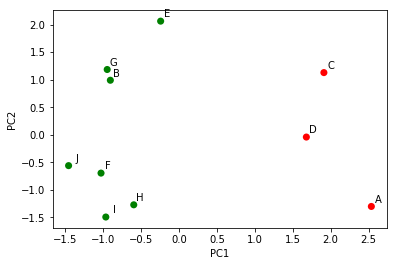

In [11]:
## Show the Cluster Plot
plt.scatter(x=plot_columns[:,0], 
            y=plot_columns[:,1],
            c=KRCDF['color'].values.tolist(),
            s=50, edgecolors='none')

for label, x, y in zip(
        plot_labels, plot_columns[:,0], 
        plot_columns[:,1]) :
    plt.annotate(
    label,
    xy=(x, y), xytext=(10, 2),
    textcoords='offset points', ha='right', va='bottom',
    )
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.show()


Activities

1. Change the number of clusters to 10 and see plot the elbow curve?

2. What happens when the number of clusters is changed to 11?

3. Change the number of clusters to 2, which points correspond to them?

4. Change the number of clusters to 4, which points correspond to them?



In [12]:
## Your code here###
## Your code here###
## Your code here###

In [13]:
## Answers here
## Identify the optimal number of clusters 
# elbow method
cluster_range = range( 1, 11 )
cluster_wss = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(scaled_RCDF)
    cluster_wss.append( clusters.inertia_ )
from collections import OrderedDict
clusters_df = pd.DataFrame( OrderedDict ( 
        {"num_clusters": cluster_range, 
        "cluster_wss": cluster_wss }
        ) )
clusters_df[0:10]

,num_clusters,cluster_wss
0,1,50.000000
1,2,31.741877
2,3,19.885638
3,4,13.534707
4,5,7.826742
5,6,3.135406
6,7,2.036463
7,8,1.149500
8,9,0.293844
9,10,0.000000


In [17]:
## Identify the optimal number of clusters 
# elbow method
cluster_range = range( 1, 12 )
cluster_wss = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(scaled_RCDF)
    cluster_wss.append( clusters.inertia_ )
from collections import OrderedDict
clusters_df = pd.DataFrame( OrderedDict ( 
        {"num_clusters": cluster_range, 
        "cluster_wss": cluster_wss }
        ) )
clusters_df[0:10]

ValueError: n_samples=10 should be >= n_clusters=11

In [18]:
## Profiling the clusters

clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(scaled_RCDF)
cluster_labels
KRCDF['Clusters'] = cluster_labels

clus_profile = KRCDF.iloc[:,2:8].groupby(['Clusters'],
                       as_index=False).mean()
clus_profile

,Clusters,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,0,2375.000000,3.000000,0.0,1.250000,4.500000
1,1,7833.333333,4.666667,1.0,1.666667,2.666667
2,2,5166.666667,4.666667,0.0,11.000000,4.666667


In [20]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(scaled_RCDF)

## Getting a Visual Plot 
## Defining Colours and Labels for the Plot
def color_fun (row):
   if (row['Clusters'] == 0):
      return "red"
   if (row['Clusters'] == 1):
      return "green"
   if (row['Clusters'] == 2):
      return "blue"
   return 0

KRCDF['color'] = KRCDF.apply (lambda row: color_fun(row), axis=1)
plot_labels = KRCDF['Name'].values.ravel()

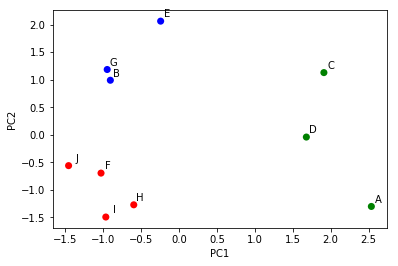

In [21]:
## Show the Cluster Plot
plt.scatter(x=plot_columns[:,0], 
            y=plot_columns[:,1],
            c=KRCDF['color'].values.tolist(),
            s=50, edgecolors='none')

for label, x, y in zip(
        plot_labels, plot_columns[:,0], 
        plot_columns[:,1]) :
    plt.annotate(
    label,
    xy=(x, y), xytext=(10, 2),
    textcoords='offset points', ha='right', va='bottom',
    )
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.show()


In [22]:
## Profiling the clusters

clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(scaled_RCDF)
cluster_labels
KRCDF['Clusters'] = cluster_labels

clus_profile = KRCDF.iloc[:,2:8].groupby(['Clusters'],
                       as_index=False).mean()
clus_profile

,Clusters,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,0,2375.000000,3.000000,0.0,1.25,4.500000
1,1,6750.000000,6.000000,1.0,2.00,4.000000
2,2,5166.666667,4.666667,0.0,11.00,4.666667
3,3,10000.000000,2.000000,1.0,1.00,0.000000


In [23]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(scaled_RCDF)

## Getting a Visual Plot 
## Defining Colours and Labels for the Plot
def color_fun (row):
   if (row['Clusters'] == 0):
      return "red"
   if (row['Clusters'] == 1):
      return "green"
   if (row['Clusters'] == 2):
      return "blue"
   if (row['Clusters'] == 3):
      return "orange"
   return 0

KRCDF['color'] = KRCDF.apply (lambda row: color_fun(row), axis=1)
plot_labels = KRCDF['Name'].values.ravel()

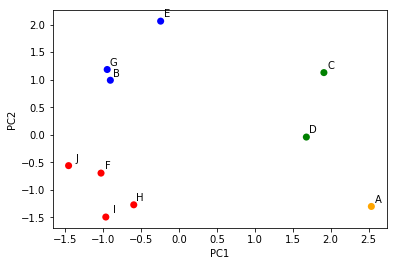

In [24]:
## Show the Cluster Plot
plt.scatter(x=plot_columns[:,0], 
            y=plot_columns[:,1],
            c=KRCDF['color'].values.tolist(),
            s=50, edgecolors='none')

for label, x, y in zip(
        plot_labels, plot_columns[:,0], 
        plot_columns[:,1]) :
    plt.annotate(
    label,
    xy=(x, y), xytext=(10, 2),
    textcoords='offset points', ha='right', va='bottom',
    )
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.show()
